In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Load CSV file
data_disase = pd.read_csv('C:/Users/Green.PC/Downloads/Heart_Disease_Dataset.csv')

data_disase has: (1190, 12)
there is not deleted features(deleted)
there is not deleted features(nan)
1    629
0    561
Name: target, dtype: int64
percent class=1 --> 0.5285714285714286
percent class=0 --> 0.4714285714285714


Text(0.5, 1.0, 'sex, Class = 1')

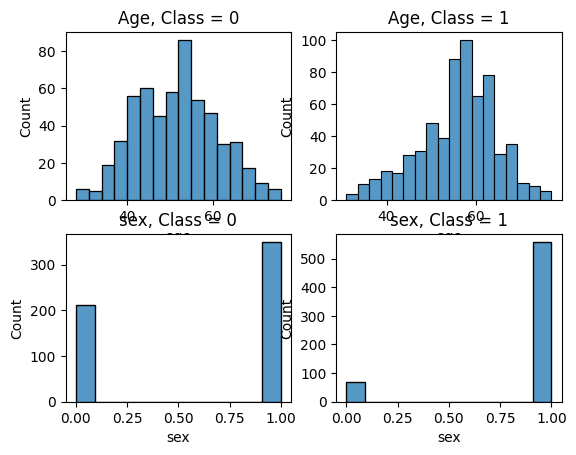

In [43]:
#Part A
#i, data Size
print("data_disase has:", data_disase.shape)

#ii
if 'deleted' in data_disase.columns:
    print('there is deleted features(deleted)')
else:
    print('there is not deleted features(deleted)')
if 'nan' in data_disase.columns:
    print('there is deleted features(nan)')
else:
    print('there is not deleted features(nan)')
    

#iii
print(data_disase['target'].value_counts())
print('percent class=1 -->', (629/(629+561)) )
print('percent class=0 -->', (561/(629+561)) )

#iv
plt.subplot(2, 2, 1)
sns.histplot(data_disase[data_disase["target"] == 0]["age"])
plt.title('Age, Class = 0')

plt.subplot(2, 2, 2)
sns.histplot(data_disase[data_disase["target"] == 1]["age"])
plt.title('Age, Class = 1')

plt.subplot(2, 2, 3)
sns.histplot(data_disase[data_disase["target"] == 0]["sex"])
plt.title('sex, Class = 0')

plt.subplot(2, 2, 4)
sns.histplot(data_disase[data_disase["target"] == 1]["sex"])
plt.title('sex, Class = 1')                         


In [56]:
#Part B
z_scores = stats.zscore(data_disase.drop("target", axis=1))
outliers = (z_scores > 3).any(axis=1)
remain_data_disase = data_disase[~outliers].reset_index(drop=True)
print("outlier data: ", data_disase[outliers])
print("remain data size:", remain_data_disase.shape)

outlier data:        age  sex  chest pain type  resting bp s  cholesterol  \
30     53    1                3           145          518   
76     32    1                4           118          529   
109    39    1                2           190          241   
149    54    1                4           130          603   
167    50    1                4           140          231   
242    54    1                4           200          198   
366    64    0                4           200            0   
400    61    1                3           200            0   
593    61    1                4           190          287   
618    67    0                3           115          564   
704    59    1                1           178          270   
734    56    0                4           200          288   
761    54    1                2           192          283   
773    55    1                4           140          217   
793    51    1                4           140          

In [57]:
#C
# finding numeric columns
num_columns = remain_data_disase.select_dtypes(include=["int64", "float64"]).columns
# Normalized
remain_data_disase[num_columns] = MinMaxScaler().fit_transform(remain_data_disase[num_columns])

In [59]:
#D
#identifying data and their target
X = remain_data_disase.drop("target", axis=1)
y = remain_data_disase["target"]

# seprating data to test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#i- using Svm model with linear kernel and fit data to model then calculate whtever the question want
lin_model = SVC(kernel='linear')
lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)
lin_f1 = f1_score(y_test, lin_preds)
lin_rec = recall_score(y_test, lin_preds)
lin_prec = precision_score(y_test, lin_preds)
lin_acc = accuracy_score(y_test, lin_preds)
print("Linear Kernel:")
print("F1 Score:", lin_f1)
print("Recall:", lin_rec)
print("Precision:", lin_prec)
print("Accuracy:", lin_acc)

#using Svm model with RBF kernel  and fit data to model then calculate whtever the question want
rbf_model = SVC(kernel='rbf', gamma='scale')
rbf_model.fit(X_train, y_train)
rbf_preds = rbf_model.predict(X_test)
rbf_f1 = f1_score(y_test, rbf_preds)
rbf_rec = recall_score(y_test, rbf_preds)
rbf_prec = precision_score(y_test, rbf_preds)
rbf_acc = accuracy_score(y_test, rbf_preds)
print("\nRBF Kernel:")
print("F1 Score:", rbf_f1)
print("Recall:", rbf_rec)
print("Precision:", rbf_prec)
print("Accuracy:", rbf_acc)

#using Svm model with Polynominal kernel  and fit data to model then calculate whtever the question want
poly_model = SVC(kernel='poly', degree=3)
poly_model.fit(X_train, y_train)
poly_preds = poly_model.predict(X_test)
poly_f1 = f1_score(y_test, poly_preds)
poly_rec = recall_score(y_test, poly_preds)
poly_prec = precision_score(y_test, poly_preds)
poly_acc = accuracy_score(y_test, poly_preds)
print("\nPolynomial Kernel:")
print("F1 Score:", poly_f1)
print("Recall:", poly_rec)
print("Precision:", poly_prec)
print("Accuracy:", poly_acc)

Linear Kernel:
F1 Score: 0.8592964824120604
Recall: 0.890625
Precision: 0.8300970873786407
Accuracy: 0.84

RBF Kernel:
F1 Score: 0.8592964824120604
Recall: 0.890625
Precision: 0.8300970873786407
Accuracy: 0.84

Polynomial Kernel:
F1 Score: 0.8781725888324873
Recall: 0.9010416666666666
Precision: 0.8564356435643564
Accuracy: 0.8628571428571429
